In [ ]:
!pip install nnunetv2
!pip install gdown
!pip install --upgrade nnunetv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
from pathlib import Path
import json
import os
import cv2
import random
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:

!conda info --envs



# conda environments:
#
                       C:\Users\ensi\anaconda3
                       C:\Users\ensi\anaconda3\anaconda4
                       C:\Users\ensi\anaconda3\anaconda4\envs\myenv
                       C:\Users\ensi\anaconda3\envs\asr
                     * C:\Users\ensi\anaconda3\envs\nnUnet
                       C:\Users\ensi\anaconda3\envs\nuscenes
                       C:\Users\ensi\anaconda3\envs\roco
                       C:\Users\ensi\anaconda3\envs\roco_env
                       C:\Users\ensi\anaconda3\envs\vehicles
                       E:\Rocopcd
base                   E:\ccc
roco_pcdenv            E:\ccc\envs\roco_pcdenv
                       E:\conda_envs\rocopcd



In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
! kaggle datasets download awsaf49/brats20-dataset-training-validation


Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation


  0%|          | 0.00/4.16G [00:00<?, ?B/s]
  0%|          | 1.00M/4.16G [00:00<46:01, 1.62MB/s]
  0%|          | 3.00M/4.16G [00:00<15:46, 4.72MB/s]
  0%|          | 7.00M/4.16G [00:00<06:23, 11.6MB/s]
  0%|          | 11.0M/4.16G [00:01<04:10, 17.8MB/s]
  0%|          | 16.0M/4.16G [00:01<02:59, 24.8MB/s]
  0%|          | 21.0M/4.16G [00:01<02:27, 30.2MB/s]
  1%|          | 25.0M/4.16G [00:01<02:20, 31.7MB/s]
  1%|          | 30.0M/4.16G [00:01<02:00, 36.9MB/s]
  1%|          | 35.0M/4.16G [00:01<01:54, 38.8MB/s]
  1%|          | 40.0M/4.16G [00:01<01:57, 37.6MB/s]
  1%|1         | 46.0M/4.16G [00:01<01:44, 42.2MB/s]
  1%|1         | 51.0M/4.16G [00:01<01:47, 40.9MB/s]
  1%|1         | 56.0M/4.16G [00:02<01:42, 43.2MB/s]
  1%|1         | 61.0M/4.16G [00:02<01:41, 43.2MB/s]
  2%|1         | 66.0M/4.16G [00:02<01:44, 42.0MB/s]
  2%|1         | 71.0M/4.16G [00:02<01:39, 44.0MB/s]
  2%|1         | 76.0M/4.16G [00:02<01:40, 43.6MB/s]
  2%|1         | 81.0M/4.16G [00:02<01:44, 42.1MB/s]
 


License(s): CC0-1.0



In [ ]:
import kagglehub

!kaggle datasets download -d dschettler8845/brats-2021-task1 -p "E:/Ouss4"

Dataset URL: https://www.kaggle.com/datasets/dschettler8845/brats-2021-task1
License(s): copyright-authors




  0%|          | 0.00/12.3G [00:00<?, ?B/s]
  0%|          | 1.00M/12.3G [00:00<1:18:51, 2.79MB/s]
  0%|          | 3.00M/12.3G [00:00<31:39, 6.94MB/s]  
  0%|          | 7.00M/12.3G [00:00<14:15, 15.4MB/s]
  0%|          | 12.0M/12.3G [00:00<09:15, 23.7MB/s]
  0%|          | 17.0M/12.3G [00:00<07:25, 29.6MB/s]
  0%|          | 22.0M/12.3G [00:00<06:28, 33.9MB/s]
  0%|          | 27.0M/12.3G [00:01<06:03, 36.3MB/s]
  0%|          | 32.0M/12.3G [00:01<05:41, 38.6MB/s]
  0%|          | 37.0M/12.3G [00:01<05:23, 40.7MB/s]
  0%|          | 42.0M/12.3G [00:01<05:22, 40.7MB/s]
  0%|          | 47.0M/12.3G [00:01<05:16, 41.5MB/s]
  0%|          | 52.0M/12.3G [00:01<05:08, 42.6MB/s]
  0%|          | 57.0M/12.3G [00:01<05:14, 41.8MB/s]
  0%|          | 62.0M/12.3G [00:01<05:10, 42.2MB/s]
  1%|          | 67.0M/12.3G [00:02<05:07, 42.7MB/s]
  1%|          | 72.0M/12.3G [00:02<05:04, 43.0MB/s]
  1%|          | 77.0M/12.3G [00:02<05:02, 43.3MB/s]
  1%|          | 82.0M/12.3G [00:02<05:07, 42.7MB/

In [ ]:
import shutil

zip_path = "E:\Ouss4\Dataset\BraTS2021_Training_Data.zip"  # Path to your ZIP file
extract_path = "Dataset"  # Destination folder

shutil.unpack_archive(zip_path, extract_path)


In [ ]:
import shutil

zip_path = r"E:\Ouss4\Dataset\BraTS2021_Training_Data.tar" # Path to your ZIP file
extract_path = "Dataset"  # Destination folder

shutil.unpack_archive(zip_path, extract_path)


In [ ]:
zip_path = r"E:\Ouss4\Dataset\BraTS2021_00621.tar" # Path to your ZIP file
extract_path = "Dataset/BraTS2021_00621"  # Destination folder

shutil.unpack_archive(zip_path, extract_path)

zip_path = r"E:\Ouss4\Dataset\BraTS2021_00495.tar" # Path to your ZIP file
extract_path = "Dataset/BraTS2021_00495"  # Destination folder

shutil.unpack_archive(zip_path, extract_path)

## DataSet

copying

In [ ]:
import os
import re

# Base dataset directory
base_dir = r"E:\Ouss4\Dataset"

# Get all folders matching the pattern BraTS2021_xxxxx
folders = [f for f in os.listdir(base_dir) if re.match(r'BraTS2021_\d+', f)]
folders.sort(key=lambda x: int(re.search(r'\d+', x).group()))  # Sort by number

# Rename folders and their contents
for new_index, old_folder in enumerate(folders):
    old_folder_path = os.path.join(base_dir, old_folder)
    new_folder_name = f"BraTS2021_{new_index:05d}"
    new_folder_path = os.path.join(base_dir, new_folder_name)

    # Rename the folder
    os.rename(old_folder_path, new_folder_path)
    print(f"Renamed folder: {old_folder} -> {new_folder_name}")

    # Rename files inside the folder
    for filename in os.listdir(new_folder_path):
        old_file_path = os.path.join(new_folder_path, filename)
        new_filename = re.sub(r'BraTS2021_\d+', new_folder_name, filename)
        new_file_path = os.path.join(new_folder_path, new_filename)

        os.rename(old_file_path, new_file_path)
        print(f"Renamed file: {filename} -> {new_filename}")

print("Renaming complete!")


Renamed folder: BraTS2021_00000 -> BraTS2021_00000
Renamed file: BraTS2021_00000_flair.nii.gz -> BraTS2021_00000_flair.nii.gz
Renamed file: BraTS2021_00000_seg.nii.gz -> BraTS2021_00000_seg.nii.gz
Renamed file: BraTS2021_00000_t1.nii.gz -> BraTS2021_00000_t1.nii.gz
Renamed file: BraTS2021_00000_t1ce.nii.gz -> BraTS2021_00000_t1ce.nii.gz
Renamed file: BraTS2021_00000_t2.nii.gz -> BraTS2021_00000_t2.nii.gz
Renamed folder: BraTS2021_00001 -> BraTS2021_00001
Renamed file: BraTS2021_00001_flair.nii.gz -> BraTS2021_00001_flair.nii.gz
Renamed file: BraTS2021_00001_seg.nii.gz -> BraTS2021_00001_seg.nii.gz
Renamed file: BraTS2021_00001_t1.nii.gz -> BraTS2021_00001_t1.nii.gz
Renamed file: BraTS2021_00001_t1ce.nii.gz -> BraTS2021_00001_t1ce.nii.gz
Renamed file: BraTS2021_00001_t2.nii.gz -> BraTS2021_00001_t2.nii.gz
Renamed folder: BraTS2021_00002 -> BraTS2021_00002
Renamed file: BraTS2021_00002_flair.nii.gz -> BraTS2021_00002_flair.nii.gz
Renamed file: BraTS2021_00002_seg.nii.gz -> BraTS2021_0000

In [ ]:
import os
import shutil

# --- User-defined parameters ---
TRAIN_DATASET_PATH = r"E:\Ouss4\Dataset" # Input data path
NNUNET_RAW_DATA_BASE = r"E:\Ouss4\nnUNet_raw" # nnUNet raw data base path
TASK_NAME = "BRATS2021" # Task name
TASK_NUMBER = "220" # Task number

# --- Define nnUNet Task Directory ---
TASK_DIR = os.path.join(NNUNET_RAW_DATA_BASE, f"Task{TASK_NUMBER}_{TASK_NAME}")
IMAGES_TR_DIR = os.path.join(TASK_DIR, "imagesTr")
LABELS_TR_DIR = os.path.join(TASK_DIR, "labelsTr")

# --- Modality and Label File Endings (.nii) ---
MODALITY_ENDINGS = ["_flair.nii.gz", "_t1.nii.gz", "_t1ce.nii.gz", "_t2.nii.gz"]
LABEL_ENDING = "_seg.nii.gz"

# --- Create directories ---
os.makedirs(IMAGES_TR_DIR, exist_ok=True)
os.makedirs(LABELS_TR_DIR, exist_ok=True)

MODALITY_NAMES = ["flair", "t1", "t1ce", "t2"] # Modality names

patient_folders = [f for f in os.listdir(TRAIN_DATASET_PATH) if os.path.isdir(os.path.join(TRAIN_DATASET_PATH, f))]

case_id = 0 # Case ID counter (still used internally in script but NOT in filenames now)

for patient_folder_name in patient_folders:
    patient_folder_path = os.path.join(TRAIN_DATASET_PATH, patient_folder_name)
    if not os.path.isdir(patient_folder_path):
        continue

    case_name = patient_folder_name # Use patient folder name as case identifier

    # Process modalities (filenames changed - NO CASE_ID in image filename)
    for modality_idx, modality_ending in enumerate(MODALITY_ENDINGS):
        modality_filename = patient_folder_name + modality_ending
        modality_filepath = os.path.join(patient_folder_path, modality_filename)

        if os.path.exists(modality_filepath):
            nnunet_image_name = f"{case_name}_{modality_idx:04d}.nii.gz" # Image filename - CHANGED: Removed _{case_id:03d}
            nnunet_image_filepath = os.path.join(IMAGES_TR_DIR, nnunet_image_name)
            shutil.copy(modality_filepath, nnunet_image_filepath)
            print(f"Copied modality: {modality_filename} to {nnunet_image_name}")
        else:
            print(f"Warning: Modality file not found: {modality_filepath}")

    # Process label (filenames remain as before - CASE_XXXX.nii - NO CASE_ID in label filename)
    label_filename = patient_folder_name + LABEL_ENDING
    label_filepath = os.path.join(patient_folder_path, label_filename)

    if os.path.exists(label_filepath):
        nnunet_label_name = f"{case_name}.nii.gz" # Label filename - KEEP AS IS (already correct)
        nnunet_label_filepath = os.path.join(LABELS_TR_DIR, nnunet_label_name)
        shutil.copy(label_filepath, nnunet_label_filepath)
        print(f"Copied label: {label_filename} to {nnunet_label_name}")
    else:
        print(f"Warning: Label file not found: {label_filepath}")

    case_id += 1 # Increment case ID (still used internally to track patients)

print("Data reorganization for training completed.")
print(f"ImagesTr folder created at: {IMAGES_TR_DIR}")
print(f"LabelsTr folder created at: {LABELS_TR_DIR}")

Copied modality: BraTS2021_00000_flair.nii.gz to BraTS2021_00000_0000.nii.gz
Copied modality: BraTS2021_00000_t1.nii.gz to BraTS2021_00000_0001.nii.gz
Copied modality: BraTS2021_00000_t1ce.nii.gz to BraTS2021_00000_0002.nii.gz
Copied modality: BraTS2021_00000_t2.nii.gz to BraTS2021_00000_0003.nii.gz
Copied label: BraTS2021_00000_seg.nii.gz to BraTS2021_00000.nii.gz
Copied modality: BraTS2021_00001_flair.nii.gz to BraTS2021_00001_0000.nii.gz
Copied modality: BraTS2021_00001_t1.nii.gz to BraTS2021_00001_0001.nii.gz
Copied modality: BraTS2021_00001_t1ce.nii.gz to BraTS2021_00001_0002.nii.gz
Copied modality: BraTS2021_00001_t2.nii.gz to BraTS2021_00001_0003.nii.gz
Copied label: BraTS2021_00001_seg.nii.gz to BraTS2021_00001.nii.gz
Copied modality: BraTS2021_00002_flair.nii.gz to BraTS2021_00002_0000.nii.gz
Copied modality: BraTS2021_00002_t1.nii.gz to BraTS2021_00002_0001.nii.gz
Copied modality: BraTS2021_00002_t1ce.nii.gz to BraTS2021_00002_0002.nii.gz
Copied modality: BraTS2021_00002_t2.n

In [ ]:
import os
import shutil
import re
import random

# Define dataset directories
base_dir = r"E:\Ouss4\nnUNet_raw\Task220_BRATS2021"
images_tr = os.path.join(base_dir, "imagesTr")
labels_tr = os.path.join(base_dir, "labelsTr")
images_ts = os.path.join(base_dir, "imagesTs")
labels_ts = os.path.join(base_dir, "labelsTs")

# Ensure testing folders exist
os.makedirs(images_ts, exist_ok=True)
os.makedirs(labels_ts, exist_ok=True)

# Get all case IDs from imagesTr (BraTS2021_XXXXX_0000.nii.gz format)
cases = sorted(set(re.match(r'BraTS2021_(\d+)_0000\.nii\.gz', f).group(1)
                   for f in os.listdir(images_tr) if re.match(r'BraTS2021_\d+_0000\.nii\.gz', f)),
               key=int)

# Randomly shuffle and split cases: 1000 for training, 251 for testing
random.shuffle(cases)
train_cases = cases[:1000]
test_cases = cases[1000:]

# Move testing cases to imagesTs and labelsTs
for case in test_cases:
    for i in range(4):  # 0000 to 0003
        img_file = f"BraTS2021_{case}_{i:04d}.nii.gz"
        img_src = os.path.join(images_tr, img_file)
        img_dst = os.path.join(images_ts, img_file)
        if os.path.exists(img_src):
            shutil.move(img_src, img_dst)
            print(f"Moved: {img_file} -> imagesTs")

    # Move label file
    label_file = f"BraTS2021_{case}.nii.gz"
    label_src = os.path.join(labels_tr, label_file)
    label_dst = os.path.join(labels_ts, label_file)
    if os.path.exists(label_src):
        shutil.move(label_src, label_dst)
        print(f"Moved: {label_file} -> labelsTs")

print("Random dataset split completed!")


Moved: BraTS2021_00735_0000.nii.gz -> imagesTs
Moved: BraTS2021_00735_0001.nii.gz -> imagesTs
Moved: BraTS2021_00735_0002.nii.gz -> imagesTs
Moved: BraTS2021_00735_0003.nii.gz -> imagesTs
Moved: BraTS2021_00735.nii.gz -> labelsTs
Moved: BraTS2021_00247_0000.nii.gz -> imagesTs
Moved: BraTS2021_00247_0001.nii.gz -> imagesTs
Moved: BraTS2021_00247_0002.nii.gz -> imagesTs
Moved: BraTS2021_00247_0003.nii.gz -> imagesTs
Moved: BraTS2021_00247.nii.gz -> labelsTs
Moved: BraTS2021_00588_0000.nii.gz -> imagesTs
Moved: BraTS2021_00588_0001.nii.gz -> imagesTs
Moved: BraTS2021_00588_0002.nii.gz -> imagesTs
Moved: BraTS2021_00588_0003.nii.gz -> imagesTs
Moved: BraTS2021_00588.nii.gz -> labelsTs
Moved: BraTS2021_00527_0000.nii.gz -> imagesTs
Moved: BraTS2021_00527_0001.nii.gz -> imagesTs
Moved: BraTS2021_00527_0002.nii.gz -> imagesTs
Moved: BraTS2021_00527_0003.nii.gz -> imagesTs
Moved: BraTS2021_00527.nii.gz -> labelsTs
Moved: BraTS2021_01201_0000.nii.gz -> imagesTs
Moved: BraTS2021_01201_0001.nii.g

In [ ]:
import shutil

source = r"E:\Ouss4\nnUNet_raw\Task220_BRATS2021\labelsTs"  # Replace with the actual folder path
destination = r"E:\Ouss4"  # Replace with the target path

shutil.move(source, destination)
print("Folder moved successfully!")


Folder moved successfully!


In [ ]:
import os

# Define the paths for the directories
old_directory = r"E:\Ouss4\nnUNet_raw\Task220_BRATS2021"
new_directory = r"E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg"

# Rename the directory
os.rename(old_directory, new_directory)

print(f"Directory renamed from {old_directory} to {new_directory}")


FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'E:\\Ouss4\\nnUNet_raw\\Task220_BRATS2021' -> 'E:\\Ouss4\\nnUNet_raw\\Dataset220_BrainTumorSeg'

# Json file

In [ ]:
import json
import os
from pathlib import Path

# Define dataset path
dataset_path = r"E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg"

# Define subdirectories
imagesTr_path = Path(dataset_path) / "imagesTr"
imagesTs_path = Path(dataset_path) / "imagesTs"
labelsTr_path = Path(dataset_path) / "labelsTr"

# Count the number of training and test files
num_training = len(list(labelsTr_path.glob("*.nii.gz")))
num_test = len(list(imagesTs_path.glob("*_0000.nii.gz")))

# Create the dataset.json content
dataset_json = {
    "name": "Dataset001_BrainTumorSeg",
    "description": "Brain Tumor Segmentation Dataset with multiple modalities",
    "reference": "Your dataset reference here",
    "licence": "Your dataset license here",
    "release": "1.0",
    "tensorImageSize": "3D",
    "modality": {
        "0": "T1",
        "1": "T1ce",
        "2": "T2",
        "3": "FLAIR"
    },
    "labels": {
        "background": 0,
        "necrotic": 1,
        "edema": 2,
        "enhancing": 3
    },
    "numTraining": num_training,
    "numTest": num_test,
    "training": [
        {
            "image": [
                f"./imagesTr/{file.stem}_0000.nii.gz",
                f"./imagesTr/{file.stem}_0001.nii.gz",
                f"./imagesTr/{file.stem}_0002.nii.gz",
                f"./imagesTr/{file.stem}_0003.nii.gz"
            ],
            "label": f"./labelsTr/{file.name}"
        }
        for file in labelsTr_path.glob("*.nii.gz")
    ],
    "test": [
        [
            f"./imagesTs/{file.stem}_0000.nii.gz",
            f"./imagesTs/{file.stem}_0001.nii.gz",
            f"./imagesTs/{file.stem}_0002.nii.gz",
            f"./imagesTs/{file.stem}_0003.nii.gz"
        ]
        for file in imagesTs_path.glob("*_0000.nii.gz")
    ],
    "file_ending": ".nii.gz",
    "channel_names": {
        "0": "T1",
        "1": "T1ce",
        "2": "T2",
        "3": "FLAIR"
    }
}

# Save the dataset.json file
json_path = os.path.join(dataset_path, "dataset.json")
with open(json_path, "w") as f:
    json.dump(dataset_json, f, indent=4)

# Print summary
print(f"Dataset summary:")
print(f"Number of training cases: {num_training}")
print(f"Number of test cases: {num_test}")
print(f"dataset.json has been saved at: {json_path}")



Dataset summary:
Number of training cases: 1000
Number of test cases: 251
dataset.json has been saved at: E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\dataset.json


In [ ]:
import os
import nibabel as nib
import numpy as np

# Define directory containing label files
label_dir = r"E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\labelsTr"

# Ensure the directory exists
if not os.path.exists(label_dir):
    print("Error: Label directory not found!")
    exit()

# List all .nii.gz files in the label directory
label_files = [f for f in os.listdir(label_dir) if f.endswith(".nii.gz")]

# Process each label file
for label_file in label_files:
    label_path = os.path.join(label_dir, label_file)

    # Load the label file
    nii = nib.load(label_path)
    data = nii.get_fdata()  # Get the label array as a NumPy array

    # Replace 4 with 3
    data[data == 4] = 3

    # Save the modified label file
    new_nii = nib.Nifti1Image(data.astype(np.uint8), nii.affine, nii.header)
    nib.save(new_nii, label_path)

    print(f"Processed: {label_file}")

print("Label conversion completed.")


Processed: BraTS20_Training_001.nii.gz
Processed: BraTS20_Training_002.nii.gz
Processed: BraTS20_Training_003.nii.gz
Processed: BraTS20_Training_004.nii.gz
Processed: BraTS20_Training_005.nii.gz
Processed: BraTS20_Training_006.nii.gz
Processed: BraTS20_Training_007.nii.gz
Processed: BraTS20_Training_008.nii.gz
Processed: BraTS20_Training_009.nii.gz
Processed: BraTS20_Training_010.nii.gz
Processed: BraTS20_Training_011.nii.gz
Processed: BraTS20_Training_012.nii.gz
Processed: BraTS20_Training_013.nii.gz
Processed: BraTS20_Training_014.nii.gz
Processed: BraTS20_Training_015.nii.gz
Processed: BraTS20_Training_016.nii.gz
Processed: BraTS20_Training_017.nii.gz
Processed: BraTS20_Training_018.nii.gz
Processed: BraTS20_Training_019.nii.gz
Processed: BraTS20_Training_020.nii.gz
Processed: BraTS20_Training_021.nii.gz
Processed: BraTS20_Training_022.nii.gz
Processed: BraTS20_Training_023.nii.gz
Processed: BraTS20_Training_024.nii.gz
Processed: BraTS20_Training_025.nii.gz
Processed: BraTS20_Traini

In [ ]:
import os
import nibabel as nib
import numpy as np

# Define directory containing label files
label_dir = r"E:\Ouss4\labelsTs"

# Ensure the directory exists
if not os.path.exists(label_dir):
    print("Error: Label directory not found!")
    exit()

# List all .nii.gz files in the label directory
label_files = [f for f in os.listdir(label_dir) if f.endswith(".nii.gz")]

# Process each label file
for label_file in label_files:
    label_path = os.path.join(label_dir, label_file)

    # Load the label file
    nii = nib.load(label_path)
    data = nii.get_fdata()  # Get the label array as a NumPy array

    # Replace 4 with 3
    data[data == 4] = 3

    # Save the modified label file
    new_nii = nib.Nifti1Image(data.astype(np.uint8), nii.affine, nii.header)
    nib.save(new_nii, label_path)

    print(f"Processed: {label_file}")

print("Label conversion completed.")


Processed: BraTS2021_00010.nii.gz
Processed: BraTS2021_00016.nii.gz
Processed: BraTS2021_00037.nii.gz
Processed: BraTS2021_00038.nii.gz
Processed: BraTS2021_00042.nii.gz
Processed: BraTS2021_00048.nii.gz
Processed: BraTS2021_00054.nii.gz
Processed: BraTS2021_00057.nii.gz
Processed: BraTS2021_00064.nii.gz
Processed: BraTS2021_00077.nii.gz
Processed: BraTS2021_00078.nii.gz
Processed: BraTS2021_00080.nii.gz
Processed: BraTS2021_00084.nii.gz
Processed: BraTS2021_00089.nii.gz
Processed: BraTS2021_00106.nii.gz
Processed: BraTS2021_00107.nii.gz
Processed: BraTS2021_00109.nii.gz
Processed: BraTS2021_00113.nii.gz
Processed: BraTS2021_00115.nii.gz
Processed: BraTS2021_00116.nii.gz
Processed: BraTS2021_00124.nii.gz
Processed: BraTS2021_00126.nii.gz
Processed: BraTS2021_00134.nii.gz
Processed: BraTS2021_00139.nii.gz
Processed: BraTS2021_00151.nii.gz
Processed: BraTS2021_00154.nii.gz
Processed: BraTS2021_00156.nii.gz
Processed: BraTS2021_00157.nii.gz
Processed: BraTS2021_00158.nii.gz
Processed: Bra

# Test a data l

Image Size: (240, 240, 155)
Image Spacing: (1.0, 1.0, 1.0)
Image Origin: (0.0, -239.0, 0.0)
Min Value: 0, Max Value: 3


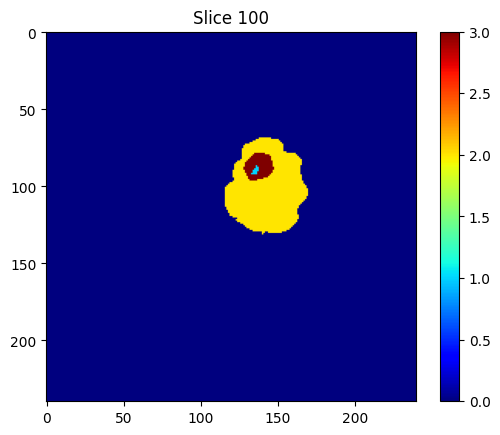

In [ ]:
import SimpleITK as sitk

def visualize_slice(image, slice_index: int = 100):
    """Visualize a slice from the image and print properties."""

    size = image.GetSize()
    spacing = image.GetSpacing()
    origin = image.GetOrigin()

    print(f"Image Size: {size}")
    print(f"Image Spacing: {spacing}")
    print(f"Image Origin: {origin}")

    img_array = sitk.GetArrayFromImage(image)

    min_value = np.min(img_array)
    max_value = np.max(img_array)
    print(f"Min Value: {min_value}, Max Value: {max_value}")

    slice_data = img_array[slice_index, :, :]
    plt.imshow(slice_data, cmap='jet')
    plt.title(f"Slice {slice_index}")
    plt.colorbar()
    plt.show()

test_image_seg_path = r"E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\labelsTr\BraTS2021_00001.nii.gz"
image = sitk.ReadImage(test_image_seg_path)
visualize_slice(image)

# nnUnetV2 Preprocessing

In [ ]:
os.environ['nnUNet_raw'] = r'E:\Ouss4\nnUNet_raw'
os.environ['nnUNet_preprocessed'] =r'E:\Ouss4\nnUNet_preprocessed'
os.environ['nnUNet_results'] = r'E:\Ouss4\nnUNet_results'

# Create the directories if they don't exist
os.makedirs(os.environ['nnUNet_raw'], exist_ok=True)
os.makedirs(os.environ['nnUNet_preprocessed'], exist_ok=True)
os.makedirs(os.environ['nnUNet_results'], exist_ok=True)

In [ ]:
!nnUNetv2_plan_and_preprocess -d 220 -c 3d_fullres -np 4

Fingerprint extraction...
Dataset220_BrainTumorSeg
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Dropping 3d_lowres config because the image size difference to 3d_fullres is too small. 3d_fullres: [140. 171. 137.], 3d_lowres: [140, 171, 137]
2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 105, 'patch_size': (192, 160), 'median_image_size_in_voxels': array([171., 137.]), 'spacing': array([1., 1.]), 'normalization_schemes': ['ZScoreNormalization', 'ZScoreNormalization', 'ZScoreNormalization', 'ZScoreNormalization'], 'use_mask_for_norm': [True, True, True, True], 'resampling_fn_d


100%|##########| 1000/1000 [01:34<00:00, 10.53it/s]

100%|##########| 1000/1000 [08:24<00:00,  1.98it/s]


In [ ]:
 !nnUNetv2_plan_and_preprocess -d 220 -c 3d_fullres -pl nnUNetPlannerResEncM -np 4

In [ ]:
!nnUNetv2_train 220 3d_fullres 0 -tr nnUNetTrainer_250epochs -p nnUNetResEncUNetMPlans

# Trainig

 ## training fold

In [ ]:
#!nnUNetv2_train 1 3d_fullres 0 -tr nnUNetTrainer_1epochs # 1epoch only (testing)
!nnUNetv2_train 220 3d_fullres 0 -tr nnUNetTrainer

#!nnUNetv2_train 1 3d_fullres 0 -tr nnUNetTrainer_100epochs #fold0
#!nnUNetv2_train 1 3d_fullres 1 -tr nnUNetTrainer_100epochs #fold1
#!nnUNetv2_train 1 3d_fullres 2 -tr nnUNetTrainer_100epochs #fold2


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-03-06 08:59:14.839034: do_dummy_2d_data_aug: False
2025-03-06 08:59:14.845654: Creating new 5-fold cross-validation split...
2025-03-06 08:59:14.858288: Desired fold for training: 0
2025-03-06 08:59:14.858288: This split has 800 training and 200 validation cases.
using pin_memory on device 

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\training\nnUNetTrainer\nnUNetTrainer.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.grad_scaler = GradScaler() if self.device.type == 'cuda' else None
C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


2025-03-06 12:27:58.377458: train_loss -0.7932
2025-03-06 12:27:58.378469: val_loss -0.7906
2025-03-06 12:27:58.378469: Pseudo dice [0.9088, 0.8954, 0.9182]
2025-03-06 12:27:58.379461: Epoch time: 59.82 s
2025-03-06 12:27:59.486646: 
2025-03-06 12:27:59.486646: Epoch 195
2025-03-06 12:27:59.486646: Current learning rate: 0.00823
2025-03-06 12:28:59.465121: train_loss -0.7939
2025-03-06 12:28:59.466159: val_loss -0.758
2025-03-06 12:28:59.466159: Pseudo dice [0.822, 0.8852, 0.9282]
2025-03-06 12:28:59.466159: Epoch time: 59.98 s
2025-03-06 12:29:00.553181: 
2025-03-06 12:29:00.553181: Epoch 196
2025-03-06 12:29:00.553181: Current learning rate: 0.00822
2025-03-06 12:30:00.419062: train_loss -0.7835
2025-03-06 12:30:00.419062: val_loss -0.7736
2025-03-06 12:30:00.420069: Pseudo dice [0.8849, 0.8982, 0.916]
2025-03-06 12:30:00.420069: Epoch time: 59.87 s
2025-03-06 12:30:01.530257: 
2025-03-06 12:30:01.530257: Epoch 197
2025-03-06 12:30:01.530257: Current learning rate: 0.00821
2025-03-06

In [ ]:
!nnUNetv2_train 220 3d_fullres 0 -tr nnUNetTrainerDa5


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################



Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ensi\anaconda3\envs\nnUnet\Scripts\nnUNetv2_train.exe\__main__.py", line 7, in <module>
  File "C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\run\run_training.py", line 275, in run_training_entry
    run_training(args.dataset_name_or_id, args.configuration, args.fold, args.tr, args.p, args.pretrained_weights,
  File "C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\run\run_training.py", line 196, in run_training
    nnunet_trainer = get_trainer_from_args(dataset_name_or_id, configuration, fold, trainer_class_name,
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\run\run_training.py", line 43, in get_trainer_from_args
    raise RuntimeError(f'Could not find requested nnunet trai

In [ ]:
!nnUNetv2_train 220 3d_fullres 0 -tr nnUNetTrainerDiceLoss


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-03-07 02:18:24.763733: do_dummy_2d_data_aug: False
2025-03-07 02:18:24.770322: Using splits from existing split file: E:\Ouss4\nnUNet_preprocessed\Dataset220_BrainTumorSeg\splits_final.json
2025-03-07 02:18:24.772337: The split file contains 5 splits.
2025-03-07 02:18:24.772337: Desired fol

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\training\nnUNetTrainer\nnUNetTrainer.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.grad_scaler = GradScaler() if self.device.type == 'cuda' else None
C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


2025-03-07 04:01:17.267593: 
2025-03-07 04:01:17.268609: Epoch 100
2025-03-07 04:01:17.268609: Current learning rate: 0.0091
2025-03-07 04:02:17.165280: train_loss -0.746
2025-03-07 04:02:17.165280: val_loss -0.736
2025-03-07 04:02:17.165280: Pseudo dice [0.8339, 0.8671, 0.9087]
2025-03-07 04:02:17.166314: Epoch time: 59.9 s
2025-03-07 04:02:18.234334: 
2025-03-07 04:02:18.234334: Epoch 101
2025-03-07 04:02:18.234334: Current learning rate: 0.00909
2025-03-07 04:03:17.959806: train_loss -0.7378
2025-03-07 04:03:17.960816: val_loss -0.7494
2025-03-07 04:03:17.960816: Pseudo dice [0.8795, 0.8937, 0.9043]
2025-03-07 04:03:17.961823: Epoch time: 59.73 s
2025-03-07 04:03:17.961823: Yayy! New best EMA pseudo Dice: 0.876
2025-03-07 04:03:20.222549: 
2025-03-07 04:03:20.223523: Epoch 102
2025-03-07 04:03:20.223523: Current learning rate: 0.00908
2025-03-07 04:04:19.920377: train_loss -0.7393
2025-03-07 04:04:19.920377: val_loss -0.7365
2025-03-07 04:04:19.920377: Pseudo dice [0.8204, 0.8692, 0

In [ ]:
!nnUNetv2_train 220 3d_fullres 1 -tr nnUNetTrainer_100epochs
!nnUNetv2_train 220 3d_fullres 2 -tr nnUNetTrainer_100epochs
!nnUNetv2_train 220 3d_fullres 3 -tr nnUNetTrainer_100epochs
!nnUNetv2_train 220 3d_fullres 4 -tr nnUNetTrainer_100epochs


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-02-26 03:43:41.200258: do_dummy_2d_data_aug: False
2025-02-26 03:43:41.207311: Using splits from existing split file: E:\Ouss4\nnUNet_preprocessed\Dataset220_BrainTumorSeg\splits_final.json
2025-02-26 03:43:41.209324: The split file contains 5 splits.
2025-02-26 03:43:41.209324: Desired fol

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\training\nnUNetTrainer\nnUNetTrainer.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.grad_scaler = GradScaler() if self.device.type == 'cuda' else None
C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-02-26 05:34:25.674554: do_dummy_2d_data_aug: False
2025-02-26 05:34:25.681135: Using splits from existing split file: E:\Ouss4\nnUNet_preprocessed\Dataset220_BrainTumorSeg\splits_final.json
2025-02-26 05:34:25.682141: The split file contains 5 splits.
2025-02-26 05:34:25.683155: Desired fol

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\training\nnUNetTrainer\nnUNetTrainer.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.grad_scaler = GradScaler() if self.device.type == 'cuda' else None
C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-02-26 07:25:32.753680: do_dummy_2d_data_aug: False
2025-02-26 07:25:32.760763: Using splits from existing split file: E:\Ouss4\nnUNet_preprocessed\Dataset220_BrainTumorSeg\splits_final.json
2025-02-26 07:25:32.762276: The split file contains 5 splits.
2025-02-26 07:25:32.762276: Desired fol

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\training\nnUNetTrainer\nnUNetTrainer.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.grad_scaler = GradScaler() if self.device.type == 'cuda' else None
C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-02-26 09:16:40.189020: do_dummy_2d_data_aug: False
2025-02-26 09:16:40.195683: Using splits from existing split file: E:\Ouss4\nnUNet_preprocessed\Dataset220_BrainTumorSeg\splits_final.json
2025-02-26 09:16:40.196699: The split file contains 5 splits.
2025-02-26 09:16:40.197729: Desired fol

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\training\nnUNetTrainer\nnUNetTrainer.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.grad_scaler = GradScaler() if self.device.type == 'cuda' else None
C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


## Prediction

dont forget to change trainer name

In [ ]:
!nnUNetv2_predict -i E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\imagesTs -o E:\Ouss4\Predictions\prediction_100_fold1 -d 220  -tr nnUNetTrainer_100epochs -c 3d_fullres -f 1 --save_probabilities
!nnUNetv2_predict -i E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\imagesTs -o E:\Ouss4\Predictions\prediction_100_fold2 -d 220  -tr nnUNetTrainer_100epochs -c 3d_fullres -f 2 --save_probabilities
!nnUNetv2_predict -i E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\imagesTs -o E:\Ouss4\Predictions\prediction_100_fold3 -d 220  -tr nnUNetTrainer_100epochs -c 3d_fullres -f 3 --save_probabilities
!nnUNetv2_predict -i E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\imagesTs -o E:\Ouss4\Predictions\prediction_100_fold4 -d 220  -tr nnUNetTrainer_100epochs -c 3d_fullres -f 4 --save_probabilities


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 251 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 251 cases that I would like to predict

Predicting BraTS2021_00010:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00010

Predicting BraTS2021_00016:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00016

Predicting BraTS2021_00037:
perform_everything_on_device: True
sending off prediction to background worker for re

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\inference\predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(j


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 251 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 251 cases that I would like to predict

Predicting BraTS2021_00010:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00010

Predicting BraTS2021_00016:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00016

Predicting BraTS2021_00037:
perform_everything_on_device: True
sending off prediction to background worker for re

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\inference\predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(j


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 251 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 251 cases that I would like to predict

Predicting BraTS2021_00010:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00010

Predicting BraTS2021_00016:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00016

Predicting BraTS2021_00037:
perform_everything_on_device: True
sending off prediction to background worker for re

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\inference\predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(j


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 251 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 251 cases that I would like to predict

Predicting BraTS2021_00010:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00010

Predicting BraTS2021_00016:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00016

Predicting BraTS2021_00037:
perform_everything_on_device: True
sending off prediction to background worker for re

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\inference\predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(j

In [ ]:
!nnUNetv2_predict -i E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\imagesTs -o E:\Ouss4\Predictions\prediction_100_fold4 -d 220  -tr nnUNetTrainer_100epochs -c 3d_fullres -f 4 --save_probabilities


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 251 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 251 cases that I would like to predict

Predicting BraTS2021_00010:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00010

Predicting BraTS2021_00016:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00016

Predicting BraTS2021_00037:
perform_everything_on_device: True
sending off prediction to background worker for re

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\inference\predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(j


perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00767

Predicting BraTS2021_00771:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00771

Predicting BraTS2021_00782:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00782

Predicting BraTS2021_00787:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00787

Predicting BraTS2021_00790:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00790

Predicting BraTS2021_00791:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS2021_00791

Predicting BraTS2021_00793:
perform_everything_on_device: True
send

In [ ]:
!nnUNetv2_predict -i E:\Ouss3\nnUNet_raw\Dataset001_BrainTumorSeg\imagesTs -o E:\Ouss4\Predictions\prediction_2020 -d 220  -tr nnUNetTrainer_250epochs -c 3d_fullres -f 0 --save_probabilities

C:\Users\ensi\anaconda3\envs\nnUnet\Lib\site-packages\nnunetv2\inference\predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(j


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 369 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 369 cases that I would like to predict

Predicting BraTS20_Training_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS20_Training_001

Predicting BraTS20_Training_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with BraTS20_Training_002

Predicting BraTS20_Training_003:
perform_everything_on_device: True
sending off prediction to

predict from folds

In [ ]:
!nnUNetv2_predict -i INPUT_FOLDER -o OUTPUT_FOLDER -d 220 -c 3d_fullres --f 0 1 2 3 4 --save_probabilities


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################



usage: nnUNetv2_predict [-h] -i I -o O -d D [-p P] [-tr TR] -c C
                        [-f F [F ...]] [-step_size STEP_SIZE] [--disable_tta]
                        [--verbose] [--save_probabilities]
                        [--continue_prediction] [-chk CHK] [-npp NPP]
                        [-nps NPS]
                        [-prev_stage_predictions PREV_STAGE_PREDICTIONS]
                        [-num_parts NUM_PARTS] [-part_id PART_ID]
                        [-device DEVICE] [--disable_progress_bar]
nnUNetv2_predict: error: unrecognized arguments: --f 0 1 2 3 4


## PostProcess

In [ ]:
from nnunetv2.postprocessing.remove_connected_components import apply_postprocessing_to_folder
from nnunetv2.postprocessing.remove_connected_components import remove_all_but_largest_component_from_segmentation

from nnunetv2.postprocessing.remove_connected_components import apply_postprocessing_to_folder, remove_all_but_largest_component_from_segmentation

postprocessing_functions = [remove_all_but_largest_component_from_segmentation]
postprocessing_kwargs = [{'labels_or_regions': [1, 2, 3]}]  # Specify the label values to process

# Specify input and output folders
input_folder = r"E:\Ouss4\Predictions\prediction_100"
output_folder = r"E:\Ouss4\Postprocess\postprocess_100"

# Specify dataset JSON path
dataset_json_path = r"E:\Ouss4\nnUNet_results\Dataset220_BrainTumorSeg\nnUNetTrainer_100epochs__nnUNetPlans__3d_fullres\dataset.json"

# Call the function

apply_postprocessing_to_folder(
    input_folder=input_folder,
    output_folder=output_folder,
    pp_fns=postprocessing_functions,
    pp_fn_kwargs=postprocessing_kwargs,
    plans_file_or_dict=None,
    dataset_json_file_or_dict=dataset_json_path,
    num_processes=4
)

## Evaluation

In [ ]:
from nnunetv2.evaluation.evaluate_predictions import compute_metrics_on_folder
from nnunetv2.imageio.simpleitk_reader_writer import SimpleITKIO  # Default reader for NIfTI files

# Set parameters according to original function signature
compute_metrics_on_folder(
    folder_ref= r"E:\Ouss3\nnUNet_raw\Dataset001_BrainTumorSeg\labelsTs",  # Ground truth
    folder_pred= r"E:\Ouss4\Predictions\prediction_2020",               # Predictions
    output_file= r"E:\Ouss4\Predictions\prediction_2020\evaluation_results.json",
    image_reader_writer=SimpleITKIO(),                                  # NIfTI reader
    file_ending=".nii.gz",                                             # File extension
    regions_or_labels=[0, 1, 2, 3],                                   # Label indices
    ignore_label=None,                                                # No ignored labels
    num_processes=4,                                                 # Parallel processing
    chill=True                                                       # Skip missing files
)

{'metric_per_case': [{'reference_file': 'E:\\Ouss3\\nnUNet_raw\\Dataset001_BrainTumorSeg\\labelsTs\\BraTS20_Training_001.nii.gz',
   'prediction_file': 'E:\\Ouss4\\Predictions\\prediction_2020\\BraTS20_Training_001.nii.gz',
   'metrics': {0: {'Dice': 0.9981607293669676,
     'IoU': 0.9963282121455068,
     'FP': 30127,
     'TP': 8714034,
     'FN': 1987,
     'TN': 181852,
     'n_pred': 8744161,
     'n_ref': 8716021},
    1: {'Dice': 0.0006510628601191445,
     'IoU': 0.0003256374352795597,
     'FP': 15460,
     'TP': 60,
     'FN': 168734,
     'TN': 8743746,
     'n_pred': 15520,
     'n_ref': 168794},
    2: {'Dice': 0.004163303998052855,
     'IoU': 0.00208599431325858,
     'FP': 140358,
     'TP': 325,
     'FN': 15118,
     'TN': 8772199,
     'n_pred': 140683,
     'n_ref': 15443},
    3: {'Dice': 0.8981906172126115,
     'IoU': 0.8151960141602203,
     'FP': 2766,
     'TP': 24870,
     'FN': 2872,
     'TN': 8897492,
     'n_pred': 27636,
     'n_ref': 27742}}},
  {'refer

In [ ]:
from nnunetv2.evaluation.evaluate_predictions import compute_metrics_on_folder
from nnunetv2.imageio.simpleitk_reader_writer import SimpleITKIO  # Default reader for NIfTI files

# Set parameters according to original function signature
compute_metrics_on_folder(
    folder_ref= r"E:\Ouss4\labelsTs",  # Ground truth
    folder_pred= r"E:\Ouss4\Predictions\prediction_100_fold4",               # Predictions
    output_file= r"E:\Ouss4\Predictions\prediction_100_fold4\evaluation_results.json",
    image_reader_writer=SimpleITKIO(),                                  # NIfTI reader
    file_ending=".nii.gz",                                             # File extension
    regions_or_labels=[0, 1, 2, 3],                                   # Label indices
    ignore_label=None,                                                # No ignored labels
    num_processes=4,                                                 # Parallel processing
    chill=True                                                       # Skip missing files
)

{'metric_per_case': [{'reference_file': 'E:\\Ouss4\\labelsTs\\BraTS2021_00010.nii.gz',
   'prediction_file': 'E:\\Ouss4\\Predictions\\prediction_100_fold4\\BraTS2021_00010.nii.gz',
   'metrics': {0: {'Dice': 0.9993560921930581,
     'IoU': 0.9987130130870369,
     'FP': 10661,
     'TP': 8852707,
     'FN': 747,
     'TN': 63885,
     'n_pred': 8863368,
     'n_ref': 8853454},
    1: {'Dice': 0.9646212847555129,
     'IoU': 0.9316603389202704,
     'FP': 193,
     'TP': 10061,
     'FN': 545,
     'TN': 8917201,
     'n_pred': 10254,
     'n_ref': 10606},
    2: {'Dice': 0.8389956015812037,
     'IoU': 0.7226463592419243,
     'FP': 886,
     'TP': 37673,
     'FN': 13573,
     'TN': 8875868,
     'n_pred': 38559,
     'n_ref': 51246},
    3: {'Dice': 0.8577841686248378,
     'IoU': 0.7509825595676738,
     'FP': 3590,
     'TP': 12229,
     'FN': 465,
     'TN': 8911716,
     'n_pred': 15819,
     'n_ref': 12694}}},
  {'reference_file': 'E:\\Ouss4\\labelsTs\\BraTS2021_00016.nii.gz',
 

Print evaluations

In [ ]:
file_path = r"E:\Ouss4\Predictions\prediction_2020\evaluation_results.json"  # Replace with your actual file path

with open(file_path, "r", encoding="utf-8") as file:
    for i in range(51):
        line = file.readline()
        if not line:  #
            break
        print(line.strip())


{
"foreground_mean": {
"Dice": 0.29288687952104614,
"FN": 26014.44805781391,
"FP": 25251.65401987353,
"IoU": 0.2539732816348423,
"TN": 8869566.120144533,
"TP": 7167.777777777778,
"n_pred": 32419.431797651312,
"n_ref": 33182.22583559169
},
"mean": {
"0": {
"Dice": 0.9993445085824019,
"FN": 4626.940379403794,
"FP": 6915.322493224932,
"IoU": 0.9986902841138846,
"TN": 92631.35501355014,
"TP": 8823826.382113822,
"n_pred": 8830741.704607045,
"n_ref": 8828453.322493225
},
"1": {
"Dice": 0.020554283659240835,
"FN": 56606.58536585366,
"FP": 18564.436314363145,
"IoU": 0.010971750079830495,
"TN": 8851705.704607045,
"TP": 1123.2737127371274,
"n_pred": 19687.71002710027,
"n_ref": 57729.85907859079
},
"2": {
"Dice": 0.05109369242350017,
"FN": 19517.544715447155,
"FP": 54964.0054200542,
"IoU": 0.02886431466362583,
"TN": 8850916.764227642,
"TP": 2601.6856368563685,
"n_pred": 57565.69105691057,
"n_ref": 22119.230352303523
},
"3": {
"Dice": 0.8070126624803975,
"FN": 1919.2140921409214,
"FP": 2226.520325

evaluate without the zeros  

In [ ]:
import json
import numpy as np

def calculate_mean_dice(data):
    class_dices = {0: [], 1: [], 2: [], 3: []}

    # Extract Dice scores for each case
    for case in data['metric_per_case']:
        for class_num, metrics in case['metrics'].items():
            dice = metrics['Dice']
            if dice !=0 and not np.isnan(dice):
                class_dices[int(class_num)].append(dice)

    # Calculate means
    means = {}
    for class_num, dices in class_dices.items():
        if dices:  # Only calculate if there are valid values
            means[class_num] = np.mean(dices)

    return means

# Parse your data
with open('E:\Ouss4\Predictions\prediction_250\evaluation_results.json') as f:
    data = json.load(f)

means = calculate_mean_dice(data)
for class_num, mean in means.items():
    print(f"Class {class_num}: {mean:.4f}")
res=(means[1]+means[2]+means[3])/3
print(f"Mean: {res:.4f}")
res2=res=(means[0]+means[1]+means[2]+means[3])/4
print(f"Mean dice: {res2:.4f}")

Class 0: 0.9995
Class 1: 0.8311
Class 2: 0.8727
Class 3: 0.8970
Mean: 0.8669
Mean dice: 0.9000


## Image segmentated

In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import numpy as np

def visualize_segmentation_slice_greybg_label0grey(image_path, segmentation_path, output_path, slice_index=None, orientation='axial', segmentation_colormap='viridis', bg_color='gray'):
    """
    Visualizes a 2D slice of a 3D medical image with segmentation overlay and saves it as a PNG.
    - Image background is displayed in specified `bg_color` (default: grey).
    - Segmentation label 0 is forced to be grey in the overlay.
    """

    try:
        # Read the image and segmentation using SimpleITK
        image_sitk = sitk.ReadImage(image_path)
        segmentation_sitk = sitk.ReadImage(segmentation_path)

        # Convert SimpleITK images to NumPy arrays
        image_np = sitk.GetArrayFromImage(image_sitk)
        segmentation_np = sitk.GetArrayFromImage(segmentation_sitk)

        # Determine slice index if not provided
        if slice_index is None:
            if orientation == 'axial':
                slice_index = image_np.shape[0] // 2
            elif orientation == 'coronal':
                slice_index = image_np.shape[1] // 2
            elif orientation == 'sagittal':
                slice_index = image_np.shape[2] // 2
            else:
                raise ValueError("Invalid orientation. Choose from 'axial', 'coronal', 'sagittal'.")

        # Extract slice based on orientation
        if orientation == 'axial':
            image_slice = image_np[slice_index, :, :]
            segmentation_slice = segmentation_np[slice_index, :, :]
        elif orientation == 'coronal':
            image_slice = image_np[:, slice_index, :]
            segmentation_slice = segmentation_np[:, slice_index, :]
        elif orientation == 'sagittal':
            image_slice = image_np[:, :, slice_index]
            segmentation_slice = segmentation_np[:, :, slice_index]

        # Create custom colormap for segmentation
        base_cmap = plt.cm.get_cmap(segmentation_colormap) # Get the original colormap (e.g., 'viridis')
        colors = base_cmap(np.linspace(0, 1, 4)) # Extract 4 colors from it
        colors[0] = [0.5, 0.5, 0.5, 1] # Set the first color (index 0) to grey (RGBA: [0.5, 0.5, 0.5, 1])
        custom_seg_cmap = ListedColormap(colors) # Create a ListedColormap from these colors


        # Create the visualization
        plt.figure(figsize=(10, 10)) # Adjust figure size as needed

        # Display the image slice in specified background color (default: grey)
        plt.imshow(image_slice, cmap=bg_color) # Set colormap for the image here

        # Overlay the segmentation with the *custom* colormap and transparency
        plt.imshow(segmentation_slice, cmap=custom_seg_cmap, alpha=0.5, vmin=0, vmax=3) # Assuming labels 0, 1, 2, 3

        # Add colorbar for segmentation labels (optional)
        plt.colorbar(ticks=[0, 1, 2, 3], label='Segmentation Labels') # Adjust ticks if your labels are different
        colorbar = plt.gca().images[-1].colorbar # Get the colorbar object
        colorbar.set_ticks([0, 1, 2, 3]) # Ensure ticks are still at 0, 1, 2, 3
        colorbar.set_ticklabels(['0 (Grey)', '1', '2', '3']) # Update tick labels to indicate 0 is grey

        # Set title and axis labels (optional)
        plt.title(f'{orientation.capitalize()} Slice {slice_index}')
        plt.xlabel('Pixel Column')
        plt.ylabel('Pixel Row')
        plt.xticks([]) # Remove x axis ticks
        plt.yticks([]) # Remove y axis ticks

        # Save the visualization as a PNG file
        plt.savefig(output_path)
        plt.close() # Close the figure to free memory

        print(f"Visualization saved to: {output_path}")

    except Exception as e:
        print(f"Error during visualization: {e}")

    # Example Usage (Replace with your actual file paths)
image_file = r"E:\Ouss4\nnUNet_raw\Dataset220_BrainTumorSeg\imagesTs\BraTS2021_00896_0000.nii.gz" # Replace with your image path
#segmentation_file = r"E:\Ouss4\Predictions\averaged_segmentations_unet_resenc_MAX_CLASS_PROB\BraTS2021_00896.nii.gz" # Replace with your segmentation path
segmentation_file = r"E:\Ouss4\labelsTs\BraTS2021_00896.nii.gz"
output_visualization_file = "segmentation_visualization250_GT.png" # Output PNG file name

visualize_segmentation_slice_greybg_label0grey(
    image_path=image_file,
    segmentation_path=segmentation_file,
    output_path=output_visualization_file,
    slice_index=70, # Example slice index, you can change or set to None for middle slice
    orientation='axial')

C:\Users\ensi\AppData\Local\Temp\ipykernel_14376\416305247.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap(segmentation_colormap) # Get the original colormap (e.g., 'viridis')


Visualization saved to: segmentation_visualization250_GT.png


In [ ]:
import nibabel as nib
import numpy as np

def find_first_index(nii_path, label):
    """
    Finds the first index (in 3D coordinates) of a given label in a NIfTI image.

    Parameters:
    nii_path (str): Path to the .nii.gz file.
    label (int): The label to search for.

    Returns:
    tuple: (x, y, z) index of the first occurrence of the label, or None if not found.
    """
    # Load the NIfTI image
    img = nib.load(nii_path)
    data = img.get_fdata()

    # Find indices where the label is present
    indices = np.argwhere(data == label)

    if indices.size == 0:
        return None  # Label not found

    return tuple(indices[0])  # Return the first occurrence

# Example usage
first_index = find_first_index(r"E:\Ouss4\labelsTs\BraTS2021_01112.nii.gz", 3)
print(first_index)


(61, 149, 86)


## prediction using average probability

In [ ]:
import os
import numpy as np
import SimpleITK as sitk

def average_probability_maps_from_folders_for_evaluation(folder_path_unet, folder_path_resenc, output_folder):
    """
    Averages probability maps, corrects argmax axis, sets output image origin to match input, saves as .nii.gz.

    Sets the Image Origin of the output segmentation to be the same as the Origin of the first U-Net prediction.
    This aims to resolve potential origin mismatches for evaluation.

    Args:
        folder_path_unet (str): Path to U-Net .npz predictions.
        folder_path_resenc (str): Path to ResEnc .npz predictions.
        output_folder (str): Output folder for .nii.gz segmentations.
    """

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    unet_npz_files = [f for f in os.listdir(folder_path_unet) if f.endswith(".npz")]
    resenc_npz_files = [f for f in os.listdir(folder_path_resenc) if f.endswith(".npz")]

    if not unet_npz_files or not resenc_npz_files:
        print("Error: Input folders must contain .npz files.")
        return

    unet_files_dict = {os.path.splitext(f)[0]: os.path.join(folder_path_unet, f) for f in unet_npz_files}
    resenc_files_dict = {os.path.splitext(f)[0]: os.path.join(folder_path_resenc, f) for f in resenc_npz_files}

    processed_basenames = set(unet_files_dict.keys()) & set(resenc_files_dict.keys())

    if not processed_basenames:
        print("Error: No matching base filenames found between input folders.")
        return

    # **Get reference image origin from the first U-Net prediction's .npz file**
    reference_npz_file_path = list(unet_files_dict.values())[0] # Get path to first U-Net .npz file
    reference_data = np.load(reference_npz_file_path)
    reference_prob_map = reference_data.get('probability_map') or reference_data.get('probabilities')
    # Assume that the sitk image created from this prob_map will have the correct origin
    reference_image_sitk = sitk.GetImageFromArray(reference_prob_map) # Create a temp sitk image to get metadata
    reference_origin = reference_image_sitk.GetOrigin()
    print(f"Using Image Origin from: {os.path.basename(reference_npz_file_path)} as reference origin: {reference_origin}")


    for basename in processed_basenames:
        npz_file1_path = unet_files_dict[basename]
        npz_file2_path = resenc_files_dict[basename]

        output_segmentation_name = f"{basename}.nii.gz" # Changed output name for clarity
        output_segmentation_path = os.path.join(output_folder, output_segmentation_name)

        try:
            print(f"Processing: {basename}")

            data1 = np.load(npz_file1_path)
            data2 = np.load(npz_file2_path)

            prob_map1 = data1.get('probability_map') or data1.get('probabilities')
            prob_map2 = data2.get('probability_map') or data2.get('probabilities')

            if prob_map1 is None or prob_map2 is None:
                print(f"Error: Probability maps not found in files for {basename}. Skipping.")
                continue


            averaged_prob_map = (prob_map1 + prob_map2) / 2.0
            segmentation_np = np.argmax(averaged_prob_map, axis=0) # Argmax along channel axis
            segmentation_sitk = sitk.GetImageFromArray(segmentation_np)


            # **Set the Image Origin of the segmentation to the reference origin**
            segmentation_sitk.SetOrigin(reference_origin) # Set origin from reference image

            print(f"  Shape of segmentation_np after argmax: {segmentation_np.shape}") # Debug print


            # Save segmentation as .nii.gz
            sitk.WriteImage(segmentation_sitk, output_segmentation_path)
            print(f"Saved averaged segmentation: {output_segmentation_path} with corrected origin.")


        except FileNotFoundError:
            print(f"Error: File not found: npz files for {basename}")
        except Exception as e:
            print(f"Error processing {basename}: {e}")

    print("Averaging and NIfTI conversion process completed with corrected Image Origin.")

input_unet_predictions_folder = r"E:\Ouss4\Predictions\prediction_250" # Replace with path to your U-Net .npz predictions
input_resenc_predictions_folder = r"E:\Ouss4\Predictions\prediction_250_ResEnc" # Replace with path to your ResEnc .npz predictions
output_averaged_segmentations_folder = r"E:\Ouss4\Predictions\averaged_segmentations_unet_resenc" # Replace with desired output folder

average_probability_maps_from_folders_for_evaluation(input_unet_predictions_folder, input_resenc_predictions_folder, output_averaged_segmentations_folder)

Using Image Origin from: BraTS2021_00010.npz as reference origin: (0.0, 0.0, 0.0)
Processing: BraTS2021_00577
  Shape of segmentation_np after argmax: (155, 240, 240)
Saved averaged segmentation: E:\Ouss4\Predictions\averaged_segmentations_unet_resenc\BraTS2021_00577.nii.gz with corrected origin.
Processing: BraTS2021_00947
  Shape of segmentation_np after argmax: (155, 240, 240)
Saved averaged segmentation: E:\Ouss4\Predictions\averaged_segmentations_unet_resenc\BraTS2021_00947.nii.gz with corrected origin.
Processing: BraTS2021_00468
  Shape of segmentation_np after argmax: (155, 240, 240)
Saved averaged segmentation: E:\Ouss4\Predictions\averaged_segmentations_unet_resenc\BraTS2021_00468.nii.gz with corrected origin.
Processing: BraTS2021_01189
  Shape of segmentation_np after argmax: (155, 240, 240)
Saved averaged segmentation: E:\Ouss4\Predictions\averaged_segmentations_unet_resenc\BraTS2021_01189.nii.gz with corrected origin.
Processing: BraTS2021_00866
  Shape of segmentation_np

In [ ]:

input_unet_predictions_folder = r"E:\Ouss4\Predictions\prediction_250" # Replace with path to your U-Net .npz predictions
input_resenc_predictions_folder = r"E:\Ouss4\Predictions\prediction_250_ResEnc" # Replace with path to your ResEnc .npz predictions
output_averaged_segmentations_folder = r"E:\Ouss4\Predictions\averaged_segmentations_unet_resenc" # Replace with desired output folder


## MAx Prob

In [ ]:
import os
import numpy as np
import SimpleITK as sitk

def average_probability_maps_from_folders_for_evaluation_MAX_CLASS_PROB(folder_path_unet, folder_path_resenc, output_folder):
    """
    Ensemble by choosing the class with the maximum probability from both U-Net and ResEnc predictions.

    For each voxel, it finds the class that has the highest probability across both models' probability distributions.

    Args:
        folder_path_unet (str): Path to U-Net .npz predictions.
        folder_path_resenc (str): Path to ResEnc .npz predictions.
        output_folder (str): Output folder for .nii.gz segmentations.
    """

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    unet_npz_files = [f for f in os.listdir(folder_path_unet) if f.endswith(".npz")]
    resenc_npz_files = [f for f in os.listdir(folder_path_resenc) if f.endswith(".npz")]

    if not unet_npz_files or not resenc_npz_files:
        print("Error: Input folders must contain .npz files.")
        return

    unet_files_dict = {os.path.splitext(f)[0]: os.path.join(folder_path_unet, f) for f in unet_npz_files}
    resenc_files_dict = {os.path.splitext(f)[0]: os.path.join(folder_path_resenc, f) for f in resenc_npz_files}

    processed_basenames = set(unet_files_dict.keys()) & set(resenc_files_dict.keys())

    if not processed_basenames:
        print("Error: No matching base filenames found between input folders.")
        return

    for basename in processed_basenames:
        npz_file1_path = unet_files_dict[basename]
        npz_file2_path = resenc_files_dict[basename]

        output_segmentation_name = f"{basename}.nii.gz" # Changed output name for clarity
        output_segmentation_path = os.path.join(output_folder, output_segmentation_name)

        try:
            print(f"Processing: {basename}")

            data1 = np.load(npz_file1_path)
            data2 = np.load(npz_file2_path)

            prob_map1 = data1.get('probability_map') or data1.get('probabilities')
            prob_map2 = data2.get('probability_map') or data2.get('probabilities')

            if prob_map1 is None or prob_map2 is None:
                print(f"Error: Probability maps not found in files for {basename}. Skipping.")
                continue

            # Initialize an array to store the ensembled segmentation
            ensembled_segmentation_np = np.zeros(prob_map1.shape[1:], dtype=np.uint8) # Spatial shape, class will be assigned

            print(f"  Shape of prob_map1: {prob_map1.shape}, Shape of prob_map2: {prob_map2.shape}") # Debug shapes

            # Iterate over each voxel (spatial dimensions - assuming channels are axis 0)
            for x in range(prob_map1.shape[1]): # Iterate over width (or first spatial dim)
                for y in range(prob_map1.shape[2]): # Iterate over height (or second spatial dim)
                    for z in range(prob_map1.shape[3]): # Iterate over depth (or third spatial dim)
                        unet_probs_voxel = prob_map1[:, x, y, z] # Probabilities from U-Net for this voxel (shape (4,))
                        resenc_probs_voxel = prob_map2[:, x, y, z] # Probabilities from ResEnc for this voxel (shape (4,))

                        # Stack probabilities from both models for this voxel
                        all_probs_voxel = np.stack((unet_probs_voxel, resenc_probs_voxel), axis=0) # Shape (2, 4) - (models, classes)

                        # Find the index of the maximum probability across both models and all classes
                        max_prob_index_2D = np.unravel_index(np.argmax(all_probs_voxel), all_probs_voxel.shape) # Get 2D index (model_index, class_index)
                        predicted_class = max_prob_index_2D[1] # Class index is the class with max probability

                        ensembled_segmentation_np[x, y, z] = predicted_class # Assign the predicted class to the voxel in ensembled segmentation

            print(f"  Shape of ensembled_segmentation_np (MAX CLASS PROB): {ensembled_segmentation_np.shape}") # Debug shape

            segmentation_sitk = sitk.GetImageFromArray(ensembled_segmentation_np)

            # Save segmentation as .nii.gz
            sitk.WriteImage(segmentation_sitk, output_segmentation_path)
            print(f"Saved MAX CLASS PROB ensembled segmentation: {output_segmentation_path}")


        except FileNotFoundError:
            print(f"Error: File not found: npz files for {basename}")
        except Exception as e:
            print(f"Error processing {basename}: {e}")

    print("MAX CLASS PROB ensembling and NIfTI conversion process completed.")

output_averaged_segmentations_folder_MAX_CLASS_PROB = r"E:\Ouss4\Predictions\averaged_segmentations_unet_resenc_MAX_CLASS_PROB" # New output folder for MAX CLASS PROB ensembling

average_probability_maps_from_folders_for_evaluation_MAX_CLASS_PROB(input_unet_predictions_folder, input_resenc_predictions_folder, output_averaged_segmentations_folder_MAX_CLASS_PROB)

Processing: BraTS2021_00577
  Shape of ensembled_segmentation_np (before reshape): (155, 240, 240)
  Shape of ensembled_segmentation_np (after reshape): (155, 240, 240)
Saved OR ensembled segmentation: E:\Ouss4\Predictions\averaged_segmentations_unet_resenc_OR\BraTS2021_00577.nii.gz with shape correction.
Processing: BraTS2021_00947
  Shape of ensembled_segmentation_np (before reshape): (155, 240, 240)
  Shape of ensembled_segmentation_np (after reshape): (155, 240, 240)
Saved OR ensembled segmentation: E:\Ouss4\Predictions\averaged_segmentations_unet_resenc_OR\BraTS2021_00947.nii.gz with shape correction.
Processing: BraTS2021_00468
  Shape of ensembled_segmentation_np (before reshape): (155, 240, 240)
  Shape of ensembled_segmentation_np (after reshape): (155, 240, 240)
Saved OR ensembled segmentation: E:\Ouss4\Predictions\averaged_segmentations_unet_resenc_OR\BraTS2021_00468.nii.gz with shape correction.
Processing: BraTS2021_01189
  Shape of ensembled_segmentation_np (before reshap

### change orgin

In [ ]:
import os
import SimpleITK as sitk

def set_origin_for_folder(folder_path, target_origin=(0.0, -239.0, 0.0)):
    """
    Sets the Image Origin of all .nii.gz files in the specified folder to the target origin.

    Warning: This function modifies the original files in place. It's recommended to back up your data first.

    Args:
        folder_path (str): Path to the folder containing .nii.gz files.
        target_origin (tuple): The target Image Origin (default: (0.0, -239.0, 0.0)).
    """

    if not os.path.exists(folder_path):
        print(f"Error: Folder '{folder_path}' does not exist.")
        return

    print(f"Warning: This function will modify the Image Origin of .nii.gz files in '{folder_path}' in place.")
    print("         It is highly recommended to back up your data before proceeding.")
    input_ = input("Do you want to continue and modify the files? (yes/no): ").lower()
    if input_ != "yes":
        print("Operation cancelled by user.")
        return

    nifti_files = [f for f in os.listdir(folder_path) if f.endswith(".nii.gz")]

    if not nifti_files:
        print(f"No .nii.gz files found in folder '{folder_path}'.")
        return

    print(f"Setting Image Origin to {target_origin} for .nii.gz files in '{folder_path}'...")

    for filename in nifti_files:
        filepath = os.path.join(folder_path, filename)
        try:
            img_sitk = sitk.ReadImage(filepath)
            original_origin = img_sitk.GetOrigin()
            img_sitk.SetOrigin(target_origin)
            modified_origin = img_sitk.GetOrigin() # Verify origin is set
            sitk.WriteImage(img_sitk, filepath) # Overwrite the original file

            print(f"  Modified Origin for '{filename}': Original Origin: {original_origin}, Set to: {modified_origin}")

        except Exception as e:
            print(f"Error processing '{filename}': {e}")

    print("Image Origin setting process completed.")

# Example Usage (Run in Notebook)
folder_to_modify_origin =  r"E:\Ouss4\Predictions\averaged_segmentations_unet_resenc_MAX_CLASS_PROB" # Replace with the path to your folder
target_origin_to_set = (0.0, -239.0, 0.0) # Your target origin

set_origin_for_folder(folder_to_modify_origin, target_origin_to_set)

         It is highly recommended to back up your data before proceeding.


Do you want to continue and modify the files? (yes/no):  yes


Setting Image Origin to (0.0, -239.0, 0.0) for .nii.gz files in 'E:\Ouss4\Predictions\averaged_segmentations_unet_resenc_MAX_CLASS_PROB'...
  Modified Origin for 'BraTS2021_00010.nii.gz': Original Origin: (0.0, 0.0, 0.0), Set to: (0.0, -239.0, 0.0)
  Modified Origin for 'BraTS2021_00016.nii.gz': Original Origin: (0.0, 0.0, 0.0), Set to: (0.0, -239.0, 0.0)
  Modified Origin for 'BraTS2021_00037.nii.gz': Original Origin: (0.0, 0.0, 0.0), Set to: (0.0, -239.0, 0.0)
  Modified Origin for 'BraTS2021_00038.nii.gz': Original Origin: (0.0, 0.0, 0.0), Set to: (0.0, -239.0, 0.0)
  Modified Origin for 'BraTS2021_00042.nii.gz': Original Origin: (0.0, 0.0, 0.0), Set to: (0.0, -239.0, 0.0)
  Modified Origin for 'BraTS2021_00048.nii.gz': Original Origin: (0.0, 0.0, 0.0), Set to: (0.0, -239.0, 0.0)
  Modified Origin for 'BraTS2021_00054.nii.gz': Original Origin: (0.0, 0.0, 0.0), Set to: (0.0, -239.0, 0.0)
  Modified Origin for 'BraTS2021_00057.nii.gz': Original Origin: (0.0, 0.0, 0.0), Set to: (0.0, -

### Post Process: CCA

In [ ]:
import os
import nibabel as nib
import numpy as np
from skimage import measure, morphology

def apply_cca_postprocessing_to_folder(input_folder, output_folder, min_component_size=50, num_classes=4):
    """
    Applies Connected Components Analysis (CCA) post-processing to all .nii.gz files in a folder.

    Args:
        input_folder (str): Path to the input folder containing .nii.gz prediction files.
        output_folder (str): Path to the output folder where CCA-processed .nii.gz files will be saved.
        min_component_size (int): Minimum voxel size for a component to be kept during CCA.
        num_classes (int): Number of segmentation classes (adjust based on your dataset).
    """

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Created output folder: {output_folder}")

    processed_count = 0
    for filename in os.listdir(input_folder):
        if filename.endswith(".nii.gz"):
            input_filepath = os.path.join(input_folder, filename)
            output_filepath = os.path.join(output_folder, filename)

            print(f"Processing: {filename}")

            try:
                # Load the NIfTI image
                img = nib.load(input_filepath)
                segmentation_data = img.get_fdata().astype(np.uint8) # Assuming segmentation is already integer labels

                # Initialize an array to store CCA processed segmentation
                cca_processed_data = np.zeros_like(segmentation_data)

                # Apply CCA for each class (assuming class labels are 1, 2, 3, ..., num_classes; 0 is background)
                for class_label in range(1, num_classes + 1): # Iterate through classes 1 to num_classes
                    binary_segmentation = (segmentation_data == class_label).astype(np.uint8)

                    # Apply Connected Components Analysis
                    labeled_components = measure.label(binary_segmentation, connectivity=1) # 3D connectivity=1

                    # Filter small components
                    refined_binary_segmentation = morphology.remove_small_objects(labeled_components, min_size=min_component_size, connectivity=1).astype(np.uint8)

                    # Add the refined binary segmentation for this class to the multi-label output
                    cca_processed_data[refined_binary_segmentation == 1] = class_label # Assign class label where component is kept


                # Create a new NIfTI image with CCA processed data
                cca_processed_img = nib.Nifti1Image(cca_processed_data, img.affine, img.header)

                # Save the CCA processed image to the output folder
                nib.save(cca_processed_img, output_filepath)
                print(f"Saved CCA processed image: {output_filepath}")
                processed_count += 1

            except Exception as e:
                print(f"Error processing {filename}: {e}")

    print(f"\nSuccessfully processed {processed_count} NIfTI files and saved to: {output_folder}")


# --- User Configuration ---
input_prediction_folder = r"E:\Ouss4\Predictions\averaged_segmentations_unet_resenc"  # <-- Replace with the path to your input prediction folder
output_cca_folder = r"E:\Ouss4\Predictions\cca_output_folder"     # <-- Replace with the desired path for the output folder
min_component_size_threshold = 10  # <-- Adjust this value to control component filtering (e.g., 50, 100, 200)
number_of_classes = 4 # <-- Set the correct number of classes in your segmentation

# --- Run CCA Post-processing ---
apply_cca_postprocessing_to_folder(input_prediction_folder, output_cca_folder, min_component_size_threshold, number_of_classes)

print("CCA post-processing script completed.")

Processing: BraTS2021_00010.nii.gz


C:\Users\ensi\AppData\Local\Temp\ipykernel_37872\694440832.py:45: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  refined_binary_segmentation = morphology.remove_small_objects(labeled_components, min_size=min_component_size, connectivity=1).astype(np.uint8)


Saved CCA processed image: E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00010.nii.gz
Processing: BraTS2021_00016.nii.gz
Saved CCA processed image: E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00016.nii.gz
Processing: BraTS2021_00037.nii.gz
Saved CCA processed image: E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00037.nii.gz
Processing: BraTS2021_00038.nii.gz
Saved CCA processed image: E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00038.nii.gz
Processing: BraTS2021_00042.nii.gz
Saved CCA processed image: E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00042.nii.gz
Processing: BraTS2021_00048.nii.gz
Saved CCA processed image: E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00048.nii.gz
Processing: BraTS2021_00054.nii.gz
Saved CCA processed image: E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00054.nii.gz
Processing: BraTS2021_00057.nii.gz
Saved CCA processed image: E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00057.nii.gz
Processing: BraTS2021_00064.nii.gz
Saved CC

### Visualize

In [ ]:
import SimpleITK as sitk

def visualize_slice(image, slice_index: int = 100):
    """Visualize a slice from the image and print properties."""

    size = image.GetSize()
    spacing = image.GetSpacing()
    origin = image.GetOrigin()

    print(f"Image Size: {size}")
    print(f"Image Spacing: {spacing}")
    print(f"Image Origin: {origin}")

    img_array = sitk.GetArrayFromImage(image)

    min_value = np.min(img_array)
    max_value = np.max(img_array)
    print(f"Min Value: {min_value}, Max Value: {max_value}")

    slice_data = img_array[slice_index, :, :]
    plt.imshow(slice_data, cmap='jet')
    plt.title(f"Slice {slice_index}")
    plt.colorbar()
    plt.show()

test_image_seg_path = r"E:\Ouss4\Predictions\cca_output_folder\BraTS2021_00010.nii.gz"
image = sitk.ReadImage(test_image_seg_path)
visualize_slice(image)

Image Size: (240, 240, 155)
Image Spacing: (1.0, 1.0, 1.0)
Image Origin: (0.0, -239.0, 0.0)
Min Value: 0, Max Value: 3


C:\Users\ensi\AppData\Local\Temp\ipykernel_37872\591524689.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
